# SI 370 - Homework #4: Machine Learning 1

In this homework exercise you will apply the machine learning techniques we've covered so far: linear regression,
machine learning pipelines, agglomerative clustering, k-means clustering, and t-SNE.

We will be using [graduate admissions data](https://www.kaggle.com/mohansacharya/graduate-admissions).

This is a fairly involved homework assignment and we *strongly* urge you to not leave this to the last minute.
We suggest that you try to work on this assignment over several days.



In [51]:
import numpy as np
import pandas as pd
import seaborn as sns

In [52]:
import matplotlib.pyplot as plt

In [53]:
admit = pd.read_csv('https://raw.githubusercontent.com/umsi-data-science/data/main/Admission_Predict.csv')

In [54]:
admit.shape

(500, 8)

In [55]:
admit.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


## Task 1 (2 points):
Perform basic exploratory data analyses on the variables in this dataframe.  Your work should include both
numerical **and** graphical overviews of the data.  The `multiplePlots` code might be helpful here.

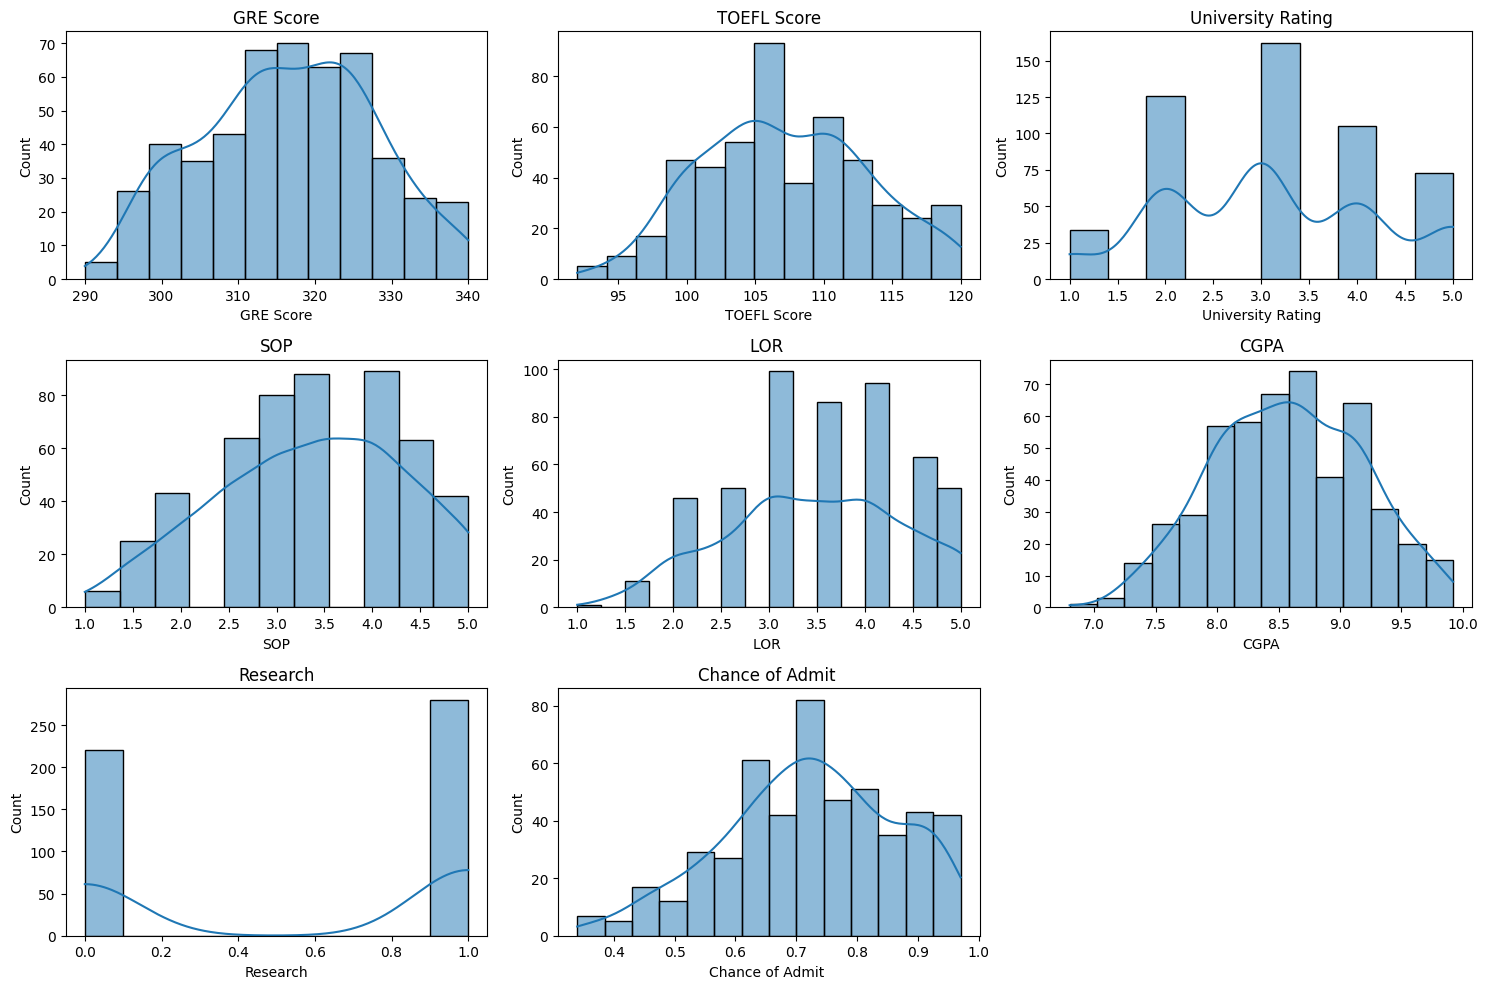

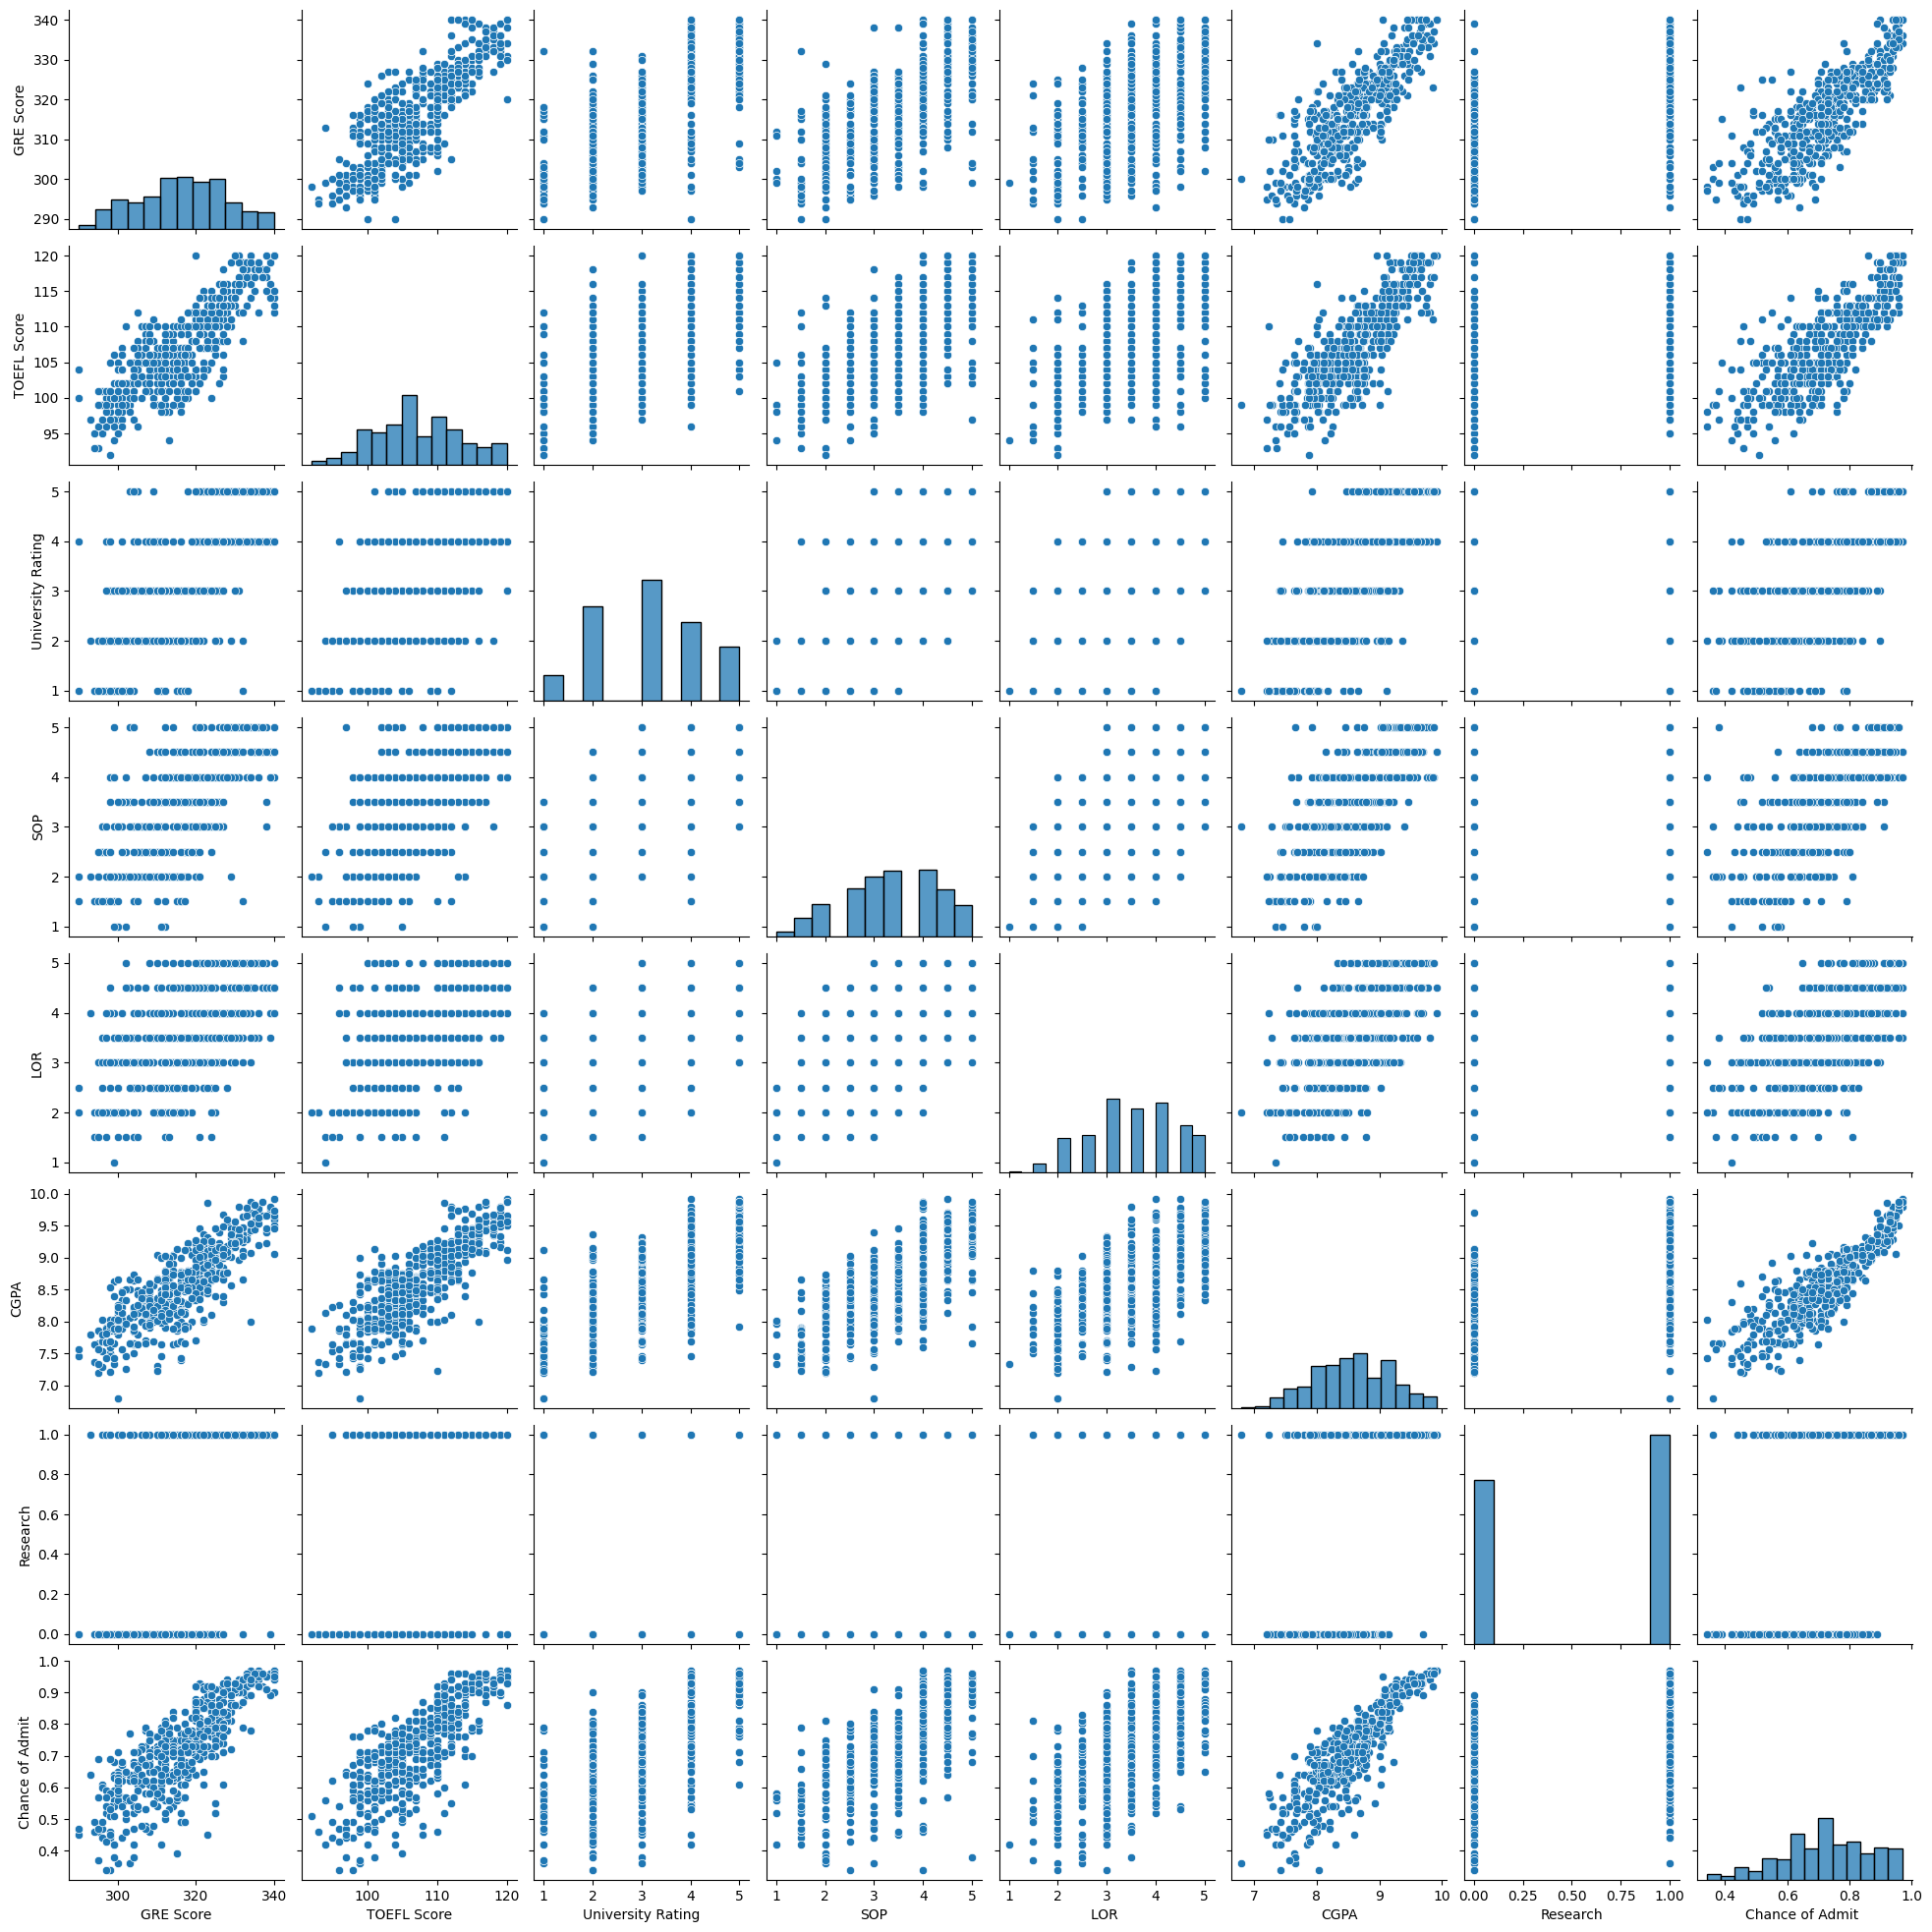

In [56]:
def multiplePlots(df, plot_type='hist', figsize=(15, 10)):
    plt.figure(figsize=figsize)
    for i, col in enumerate(df.columns):
        plt.subplot(3, 3, i + 1)
        if plot_type == 'hist':
            sns.histplot(df[col], kde=True)
        elif plot_type == 'kde':
            sns.kdeplot(df[col], fill=True)
        plt.title(col)
    plt.tight_layout()
    plt.show()


multiplePlots(admit, plot_type='hist')


sns.pairplot(admit)
plt.show()

In [57]:
admit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


Insert your code and answers here.

## Task 2a (4 points):
Use scikit-learn to conduct a linear regression that models the chance of admission based on the other variables.  Be sure to exclude "Serial No." as an explanatory variable.  Be sure to pre-process the data appropriately.  Assess how good your model is by reporting the root mean squared error (RMSE) using the test dataset from an 80-20 train-test-split of the original dataset.

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np


X = admit.drop([ 'Chance of Admit '], axis=1)
y = admit['Chance of Admit ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')


Root Mean Squared Error (RMSE): 0.0609


The RMSE is a measure of the model's accuracy, specifically how well the predicted values match the actual values.

In this case, an RMSE of 0.0609 suggests that, on average, the predicted values from this linear regression model differ from the actual values by approximately 0.0609 units. Since the RMSE is a measure of the error, a lower RMSE indicates better model performance. In this case, an RMSE of 0.0609 is relatively low, suggesting that the model is doing a good job of making accurate predictions.

Insert your code and answers here.

## Task 2b (1 point):
Based on your work in the previous task, what is the probability of admission for someone with a GRE score or 325, a TOEFL score of 108, a university rating of 3, an statement of purpose score of 3.0, a letter of recommendation score of 3.5, a high-school grade point average of 8.9, and who has research experience.

In [59]:
admit

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [60]:
new_data = [[325, 108, 3, 3.0, 3.5, 8.9, 1]]  

predicted_admission_probability = model.predict(new_data)

predicted_admission_probability


/Users/sarrahahmed/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.79229798])

The probability of admission for someone with the specified stats has a 0.792 chance of admission. considering this is well above 0.5 I would imagine it is a good chance of admission.

Insert your code and answers here.

## Task 3 (1 points):
Decide on a reasonable value for a threshold for admission.  Pick a value that you would feel comfortable with if you wanted to know whether you were likely to be accepted into a graduate program.  Create a new variable called "admitted" that is set to 1 if the chance of admission value is equal to or greater than your chosen threshold, 0 otherwise.

In [61]:
admit['admitted']=admit['Chance of Admit '].apply(lambda x: 1 if x>=0.60 else 0)

In [62]:
admit

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,admitted
0,337,118,4,4.5,4.5,9.65,1,0.92,1
1,324,107,4,4.0,4.5,8.87,1,0.76,1
2,316,104,3,3.0,3.5,8.00,1,0.72,1
3,322,110,3,3.5,2.5,8.67,1,0.80,1
4,314,103,2,2.0,3.0,8.21,0,0.65,1
...,...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87,1
496,337,117,5,5.0,5.0,9.87,1,0.96,1
497,330,120,5,4.5,5.0,9.56,1,0.93,1
498,312,103,4,4.0,5.0,8.43,0,0.73,1


Insert your code and answers here.

I chose the threshold value of 0.6 to decide whether a person was admitted or not. This is a difficult number to choose as a person could have a high chance of getting in and still not be admitted, so that is why I chose 0.6 and not 0.5. 

## Task 4 (5 points):
Using your **test** dataset (i.e. approximately 80 rows) from above, conduct an agglomerative clustering analysis using average linkage based on PCA projections of the original data onto 2 dimensions (remember to scale your data before doing the PCA).  Report the percentage of variance retained in the first two principal components. 

Do not use the chance of admission column or the "admitted" variable you created in the previous step in your input data.

Create a dendrogram, pick an appropriate "cut line" and comment on the composition of each of the resulting clusters.  Comment on the degree to which the clusters correspond to admission probabilities (note: you may find it helpful to examine the values of "admitted").

In [63]:
X_test.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'],
      dtype='object')

In [64]:
X_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
361,334,116,4,4.0,3.5,9.54,1
73,314,108,4,4.5,4.0,9.04,1
374,315,105,2,2.0,2.5,7.65,0
155,312,109,3,3.0,3.0,8.69,0
104,326,112,3,3.5,3.0,9.05,1
...,...,...,...,...,...,...,...
347,299,94,1,1.0,1.0,7.34,0
86,315,106,3,4.5,3.5,8.42,0
75,329,114,2,2.0,4.0,8.56,1
438,318,110,1,2.5,3.5,8.54,1


In [65]:
#pipe
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pipe = Pipeline([
    ('fillna',SimpleImputer(strategy='constant',fill_value=1)),
    ('scale',StandardScaler()),
    ('pca', PCA(n_components=2,random_state=42)),
    ('agglomerative',AgglomerativeClustering(affinity='euclidean',linkage='average',n_clusters=5))
])

In [66]:
ypred = pipe.fit_predict(X_test)
ypred

/Users/sarrahahmed/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([4, 1, 0, 0, 1, 4, 2, 0, 1, 1, 0, 0, 1, 4, 1, 0, 4, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 4, 4, 0, 1, 0, 0, 0, 4, 1, 1, 0, 4, 1, 1, 4, 0, 1, 4,
       4, 0, 4, 4, 1, 4, 4, 0, 3, 0, 4, 0, 4, 0, 0, 0, 0, 1, 0, 0, 2, 0,
       4, 4, 0, 0, 0, 1, 0, 0, 0, 0, 3, 4, 0, 0, 0, 4, 0, 4, 1, 1, 0, 1,
       1, 0, 1, 4, 4, 0, 1, 2, 0, 1, 1, 0])

In [68]:
pca.explained_variance_ratio_

array([0.69885961, 0.0977364 ])

(array([  5,  15,  25,  35,  45,  55,  65,  75,  85,  95, 105, 115, 125,
        135, 145, 155, 165, 175, 185, 195, 205, 215, 225, 235, 245, 255,
        265, 275, 285, 295, 305, 315, 325, 335, 345, 355, 365, 375, 385,
        395, 405, 415, 425, 435, 445, 455, 465, 475, 485, 495, 505, 515,
        525, 535, 545, 555, 565, 575, 585, 595, 605, 615, 625, 635, 645,
        655, 665, 675, 685, 695, 705, 715, 725, 735, 745, 755, 765, 775,
        785, 795, 805, 815, 825, 835, 845, 855, 865, 875, 885, 895, 905,
        915, 925, 935, 945, 955, 965, 975, 985, 995]),
 [Text(5, 0, '0.73'),
  Text(15, 0, '0.84'),
  Text(25, 0, '0.78'),
  Text(35, 0, '0.82'),
  Text(45, 0, '0.76'),
  Text(55, 0, '0.72'),
  Text(65, 0, '0.89'),
  Text(75, 0, '0.79'),
  Text(85, 0, '0.79'),
  Text(95, 0, '0.74'),
  Text(105, 0, '0.68'),
  Text(115, 0, '0.68'),
  Text(125, 0, '0.73'),
  Text(135, 0, '0.74'),
  Text(145, 0, '0.73'),
  Text(155, 0, '0.72'),
  Text(165, 0, '0.67'),
  Text(175, 0, '0.7'),
  Text(185, 0,

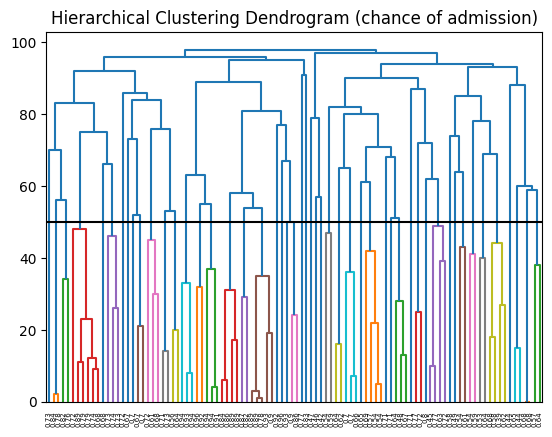

In [121]:
#dendogram

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    # Draw a horizontal line at our cutoff 
    color_threshold = kwargs.pop('color_threshold',None)
    plt.axhline(y=color_threshold,c='k')

plt.title('Hierarchical Clustering Dendrogram (chance of admission)')
plot_dendrogram(pipe.named_steps.agglomerative,labels=y_test.values,color_threshold=50)
plt.xticks(rotation=90)

different colors represent the different clusters in our data. I drew the cut line at 50, which is where each cluster begins to connect with other clusters. This dendogram tells us that many features are similar with regard to their impact on chance of admission because their distance falls below our cut threshold. many nodes have lower merging points, which also implies their similarity. 

running value_counts() on admit.admitted tells us that 405 of the data points have chances of admission that are higher than 0.6 while 95 fall below 0.6. this explains why there are so many clusters in our dendrogram. clusters that are closer to each other and connected to lots of other clusters are likely the data points that are above 0.6 or "admitted", so high clustering could mean high admission probabiliites. 



In [122]:
admit.admitted.value_counts()

1    405
0     95
Name: admitted, dtype: int64

Insert your code and answers here.

## Task 5 (4 points):
Conduct a k-means clustering of the admissions data.  Pre-process the data using a 2-dimensional PCA (remember to scale your data before doing the PCA).  Again, do not use the chance of admission or the "admitted" variable you created earlier.  Use the average silhouette score to determine the optimal number of clusters and show the silhouette plot for the optimal number of clusters.

There is a lot of code below the pre-processing. the first code block plots all silhouettes in the range of 2-15 and the second one plots only the optimal one 

In [69]:
pipe0 = Pipeline([
    ('fillna',SimpleImputer(strategy='constant',fill_value=1)),
    ('scale',StandardScaler()),
    ('pca', PCA(n_components=2,random_state=42)),    
])


pipe1 = Pipeline([
    ('preprocessing',pipe0),
    ('kmeans', KMeans(n_clusters=2,init='k-means++',random_state=42)),
])

In [71]:
Xformed = pipe0.fit_transform(X.values)
Xformed

array([[-3.56837458e+00, -3.28318069e-01],
       [-1.63919860e+00,  3.45503674e-02],
       [ 5.50991453e-01, -7.20793791e-01],
       [-3.45470192e-01, -1.28023739e+00],
       [ 2.03580394e+00,  3.93655333e-02],
       [-2.67623380e+00, -5.68147297e-01],
       [-2.85144994e-01, -7.08205656e-01],
       [ 1.83445617e+00,  1.03723988e+00],
       [ 3.57630206e+00, -5.55078864e-01],
       [ 1.93500707e-01,  4.58497982e-01],
       [-5.63762726e-01, -5.82336612e-01],
       [-2.10122921e+00, -1.14626275e-01],
       [-2.27271607e+00, -1.59683364e-01],
       [ 3.41962927e-01, -4.76531142e-01],
       [ 9.59463485e-01, -1.12189143e+00],
       [ 1.11033273e+00,  5.09238441e-01],
       [ 2.10195207e-01,  7.93668502e-01],
       [ 1.10829225e-01, -7.13761971e-01],
       [-9.33580558e-02,  7.12134789e-01],
       [ 1.37477299e+00,  1.05699409e+00],
       [ 1.12891822e+00, -1.36691458e+00],
       [ 9.92813978e-02, -1.10219937e-01],
       [-3.72751318e+00,  5.53352128e-01],
       [-4.

/Users/sarrahahmed/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sarrahahmed/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sarrahahmed/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 2 The average silhouette_score is : 0.49769043741403296


/Users/sarrahahmed/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sarrahahmed/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 3 The average silhouette_score is : 0.41143535077744364


/Users/sarrahahmed/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sarrahahmed/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sarrahahmed/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 4 The average silhouette_score is : 0.42902984948411965
For n_clusters = 5 The average silhouette_score is : 0.4186423828899898


/Users/sarrahahmed/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sarrahahmed/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 6 The average silhouette_score is : 0.4369144366420892


/Users/sarrahahmed/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sarrahahmed/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 7 The average silhouette_score is : 0.4078641349972446


/Users/sarrahahmed/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sarrahahmed/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 8 The average silhouette_score is : 0.4014097207205349


/Users/sarrahahmed/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sarrahahmed/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 9 The average silhouette_score is : 0.3807985217753768


/Users/sarrahahmed/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sarrahahmed/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 10 The average silhouette_score is : 0.3880179559574267


/Users/sarrahahmed/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sarrahahmed/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 11 The average silhouette_score is : 0.3845433891182044


/Users/sarrahahmed/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sarrahahmed/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 12 The average silhouette_score is : 0.3595642392480805


/Users/sarrahahmed/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sarrahahmed/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 13 The average silhouette_score is : 0.37307957855606433


/Users/sarrahahmed/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sarrahahmed/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 14 The average silhouette_score is : 0.37562496644841237


/Users/sarrahahmed/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sarrahahmed/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 15 The average silhouette_score is : 0.35469096269187095


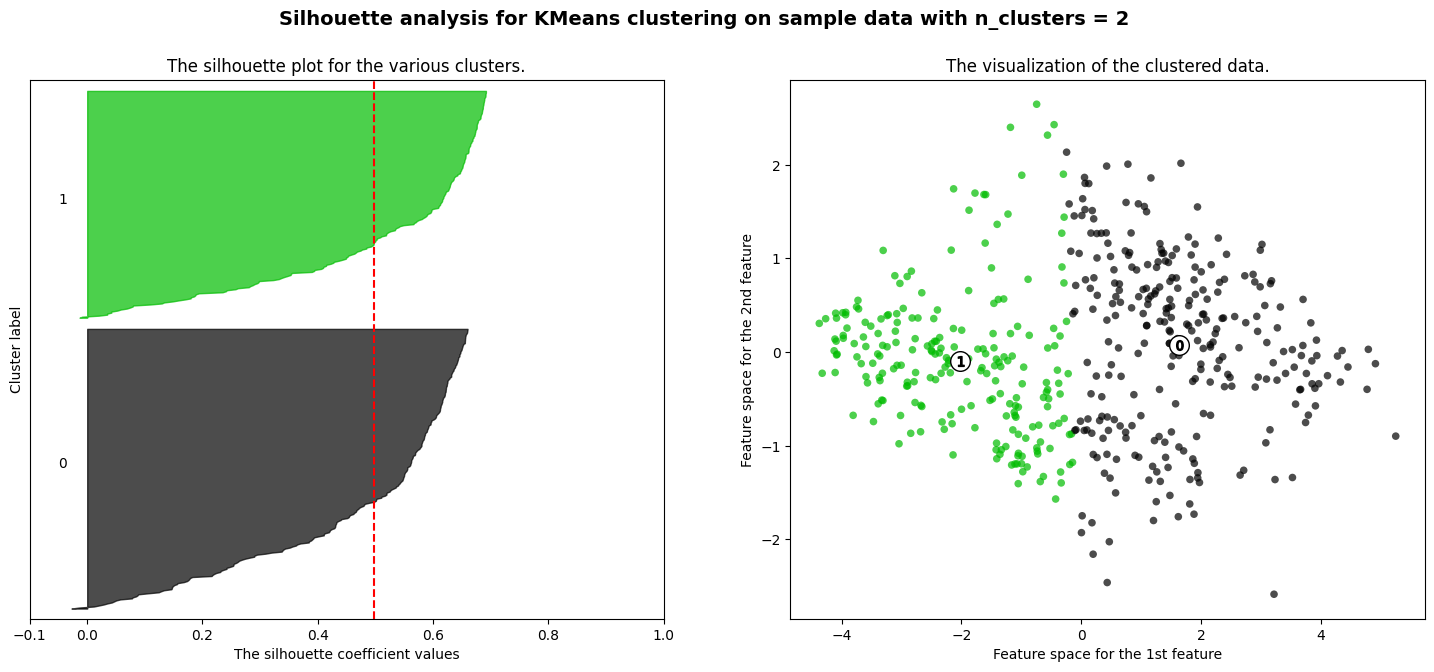

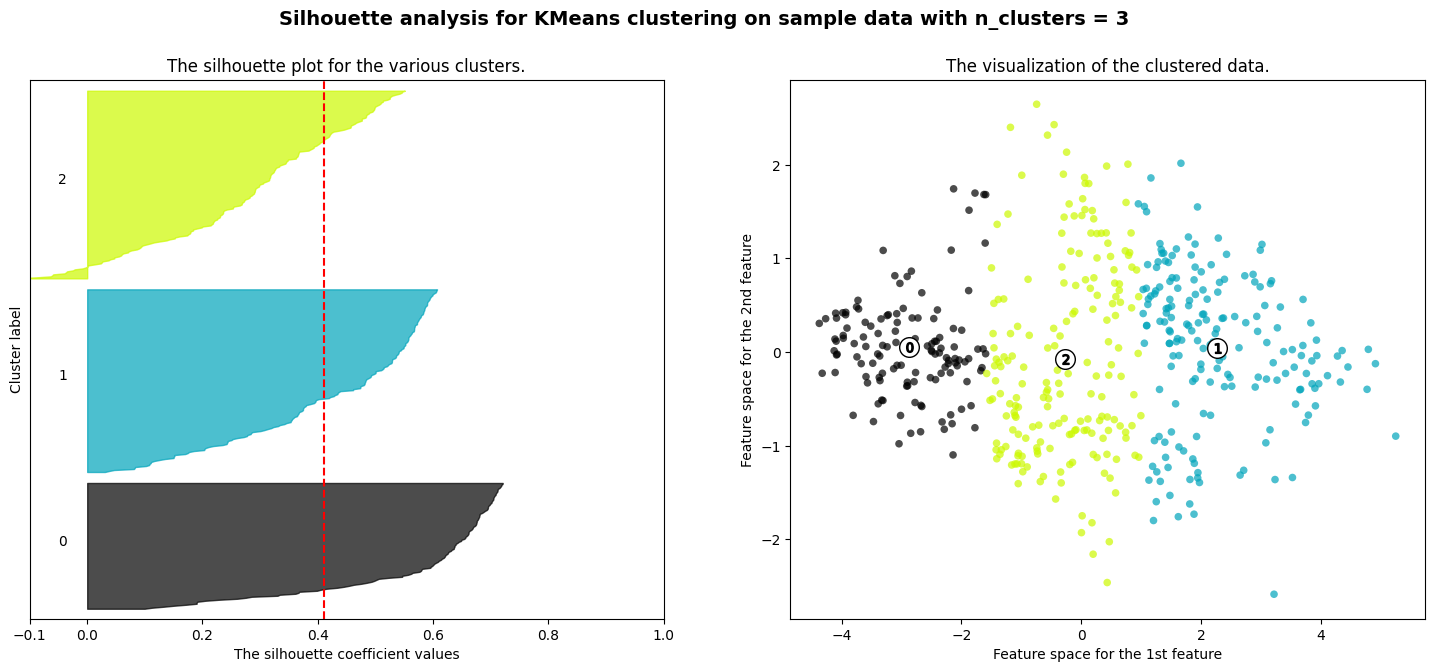

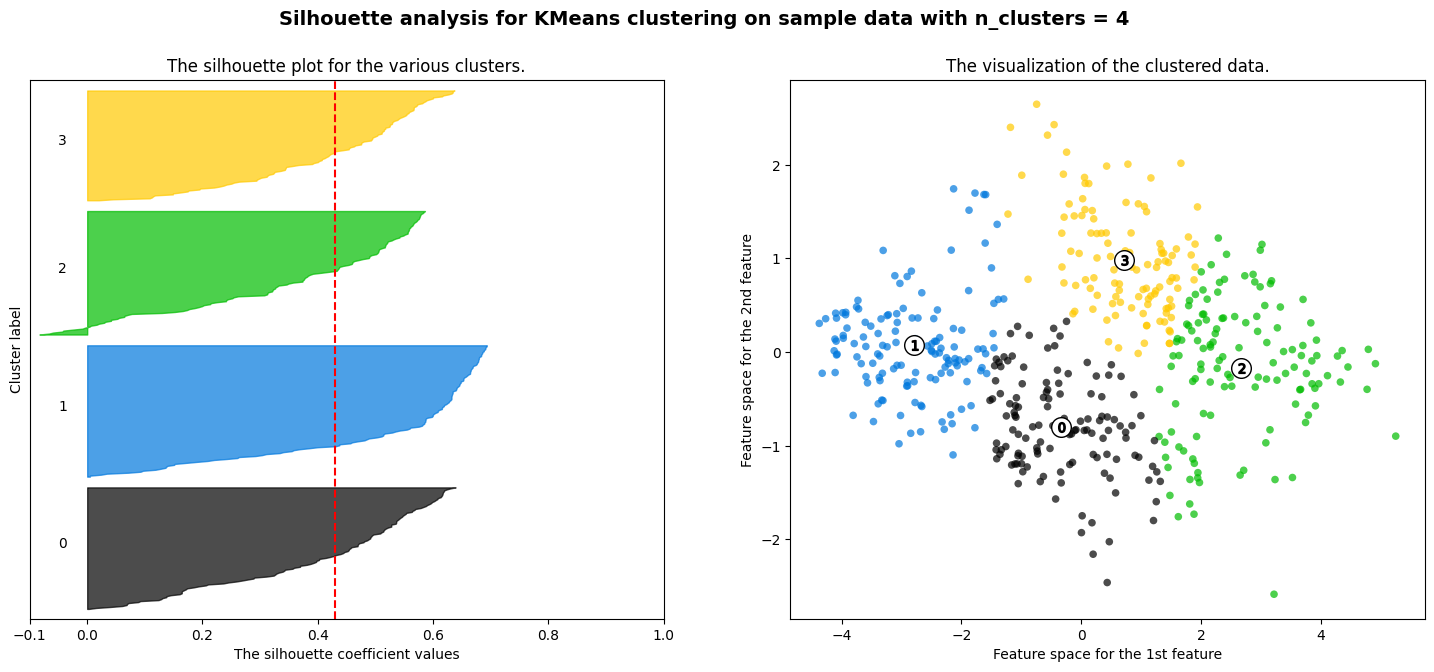

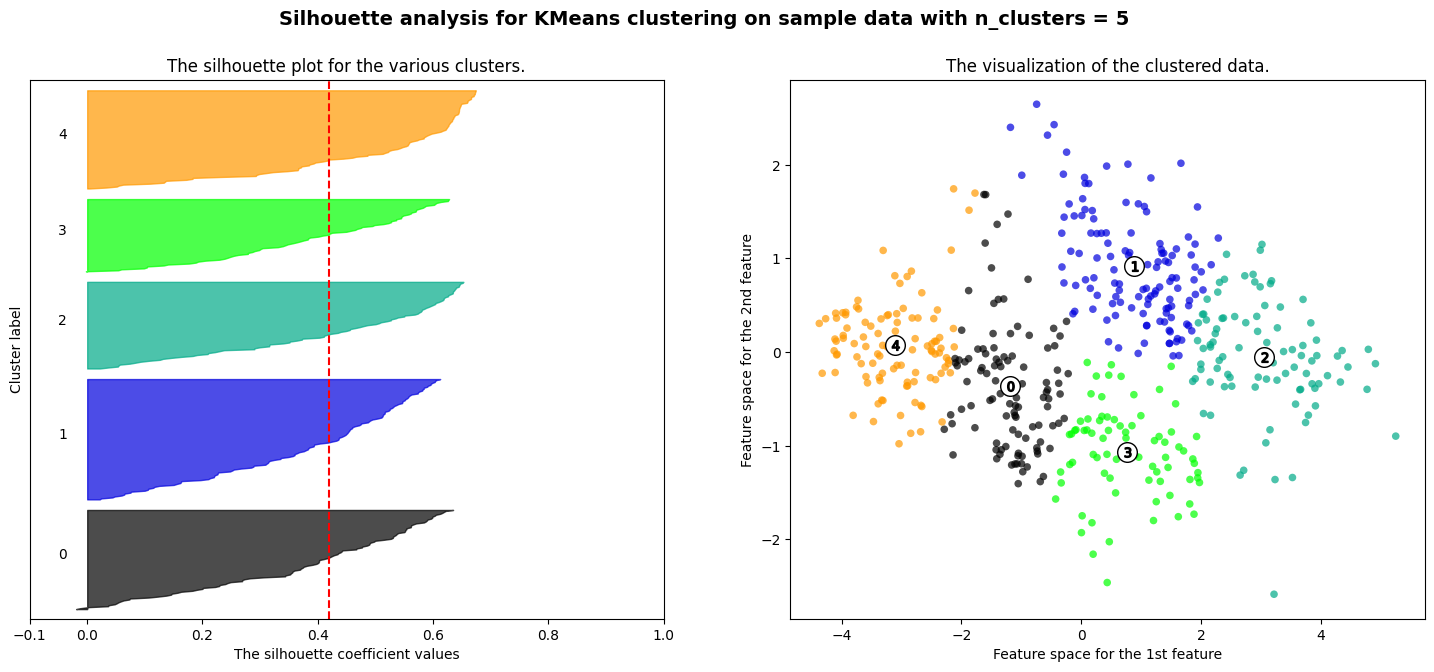

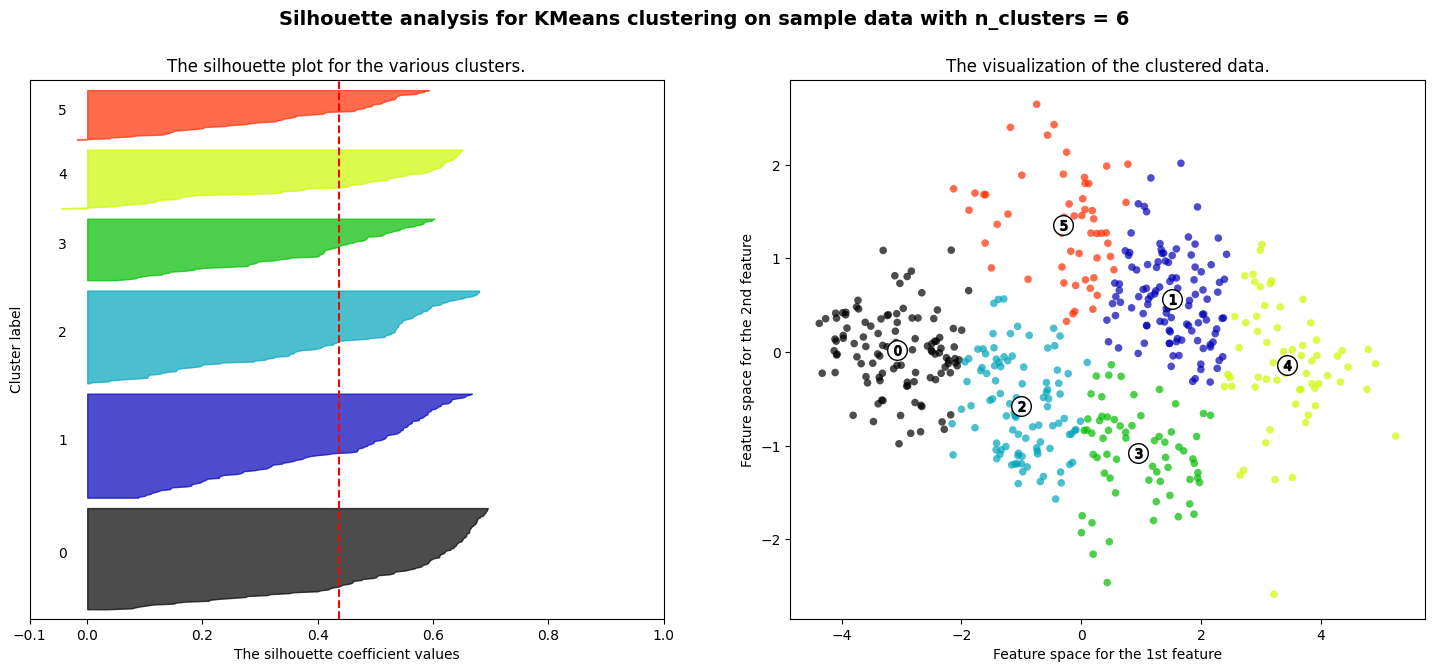

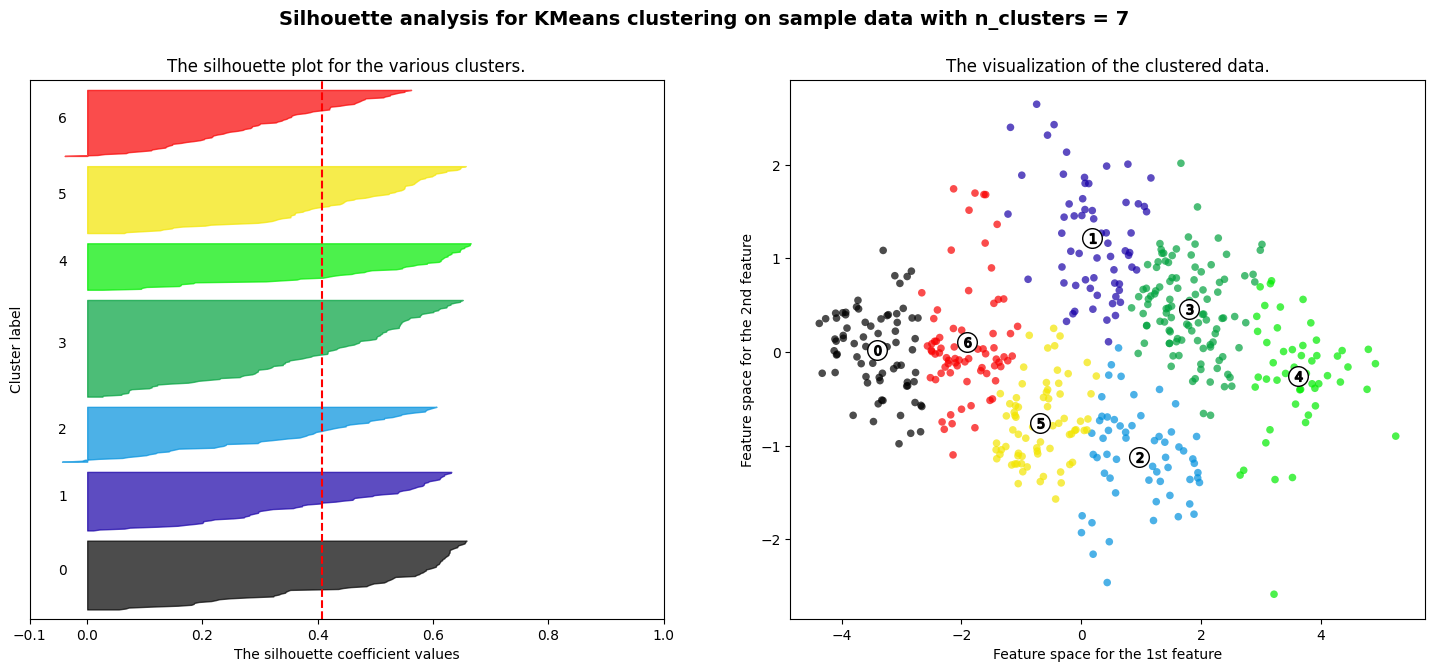

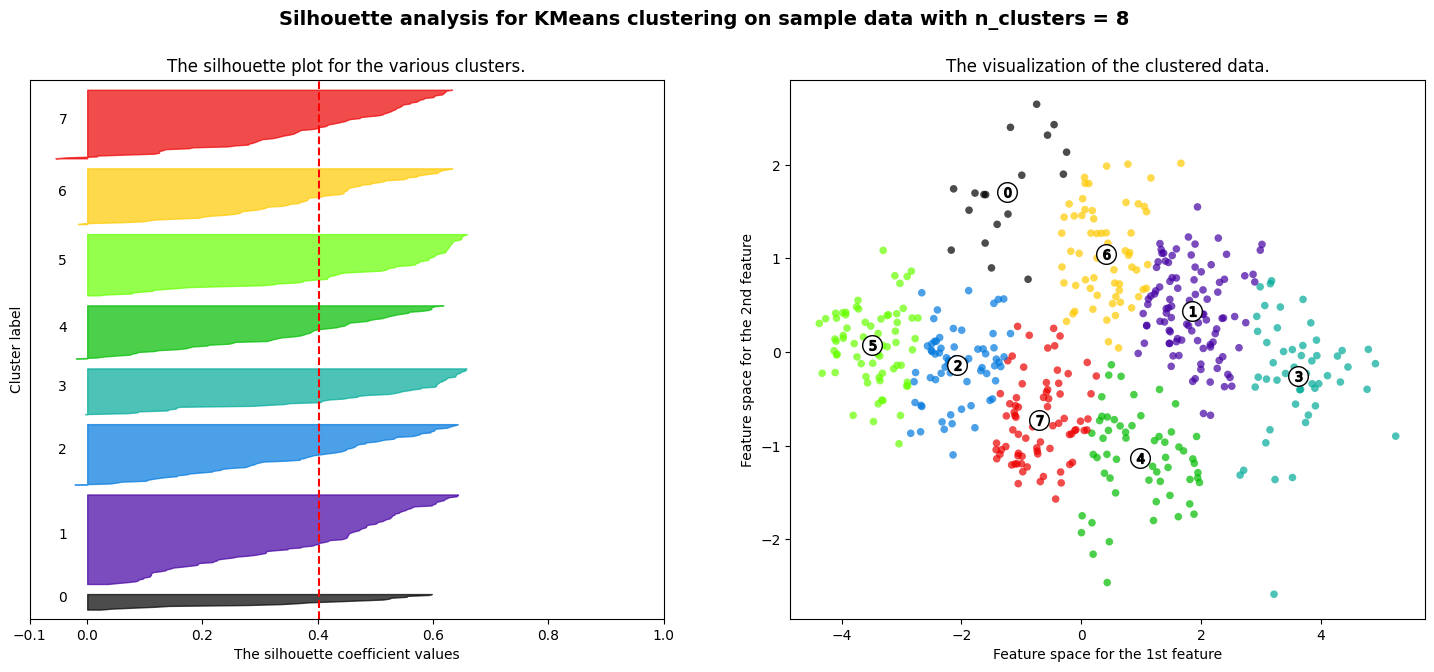

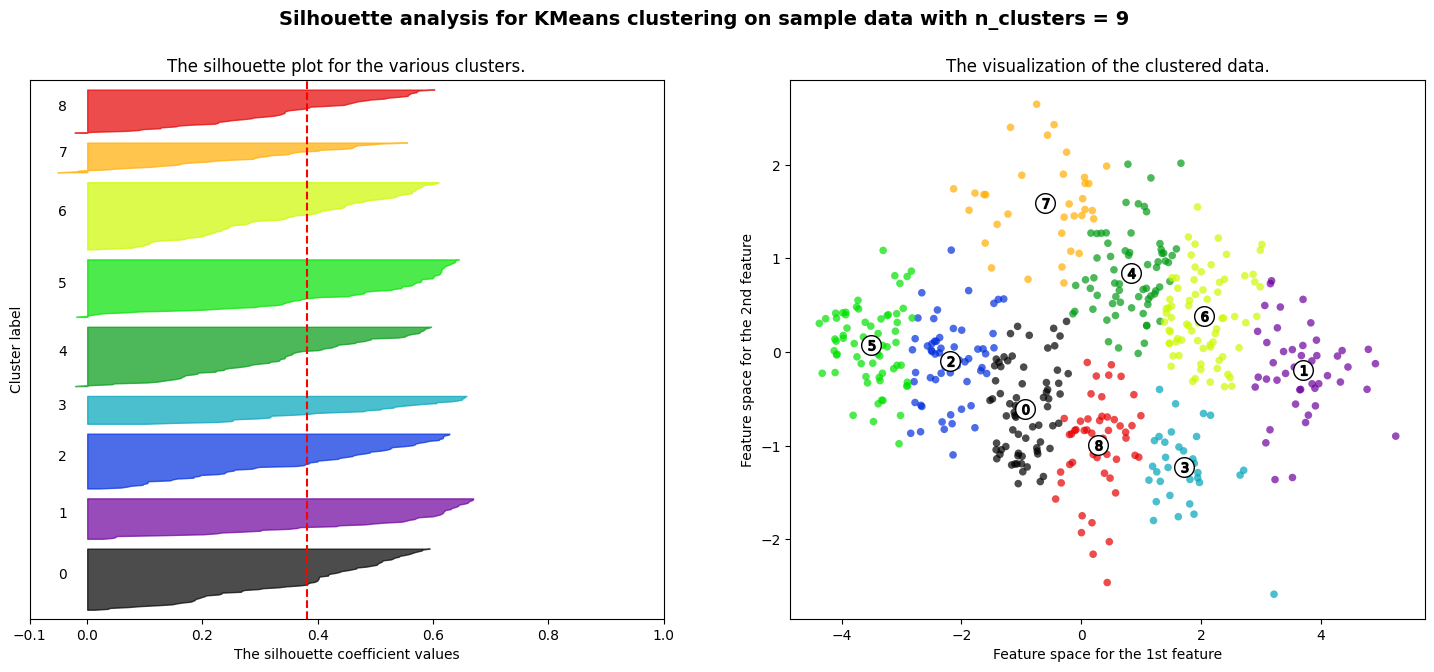

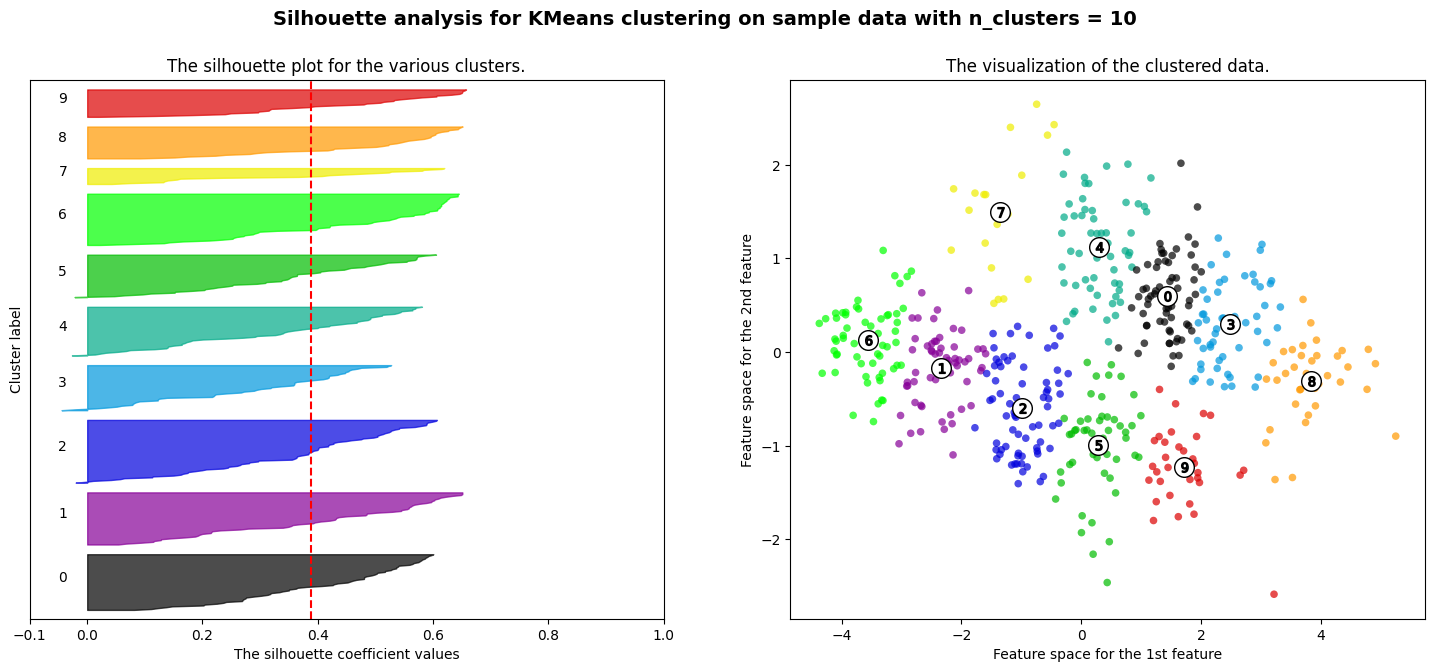

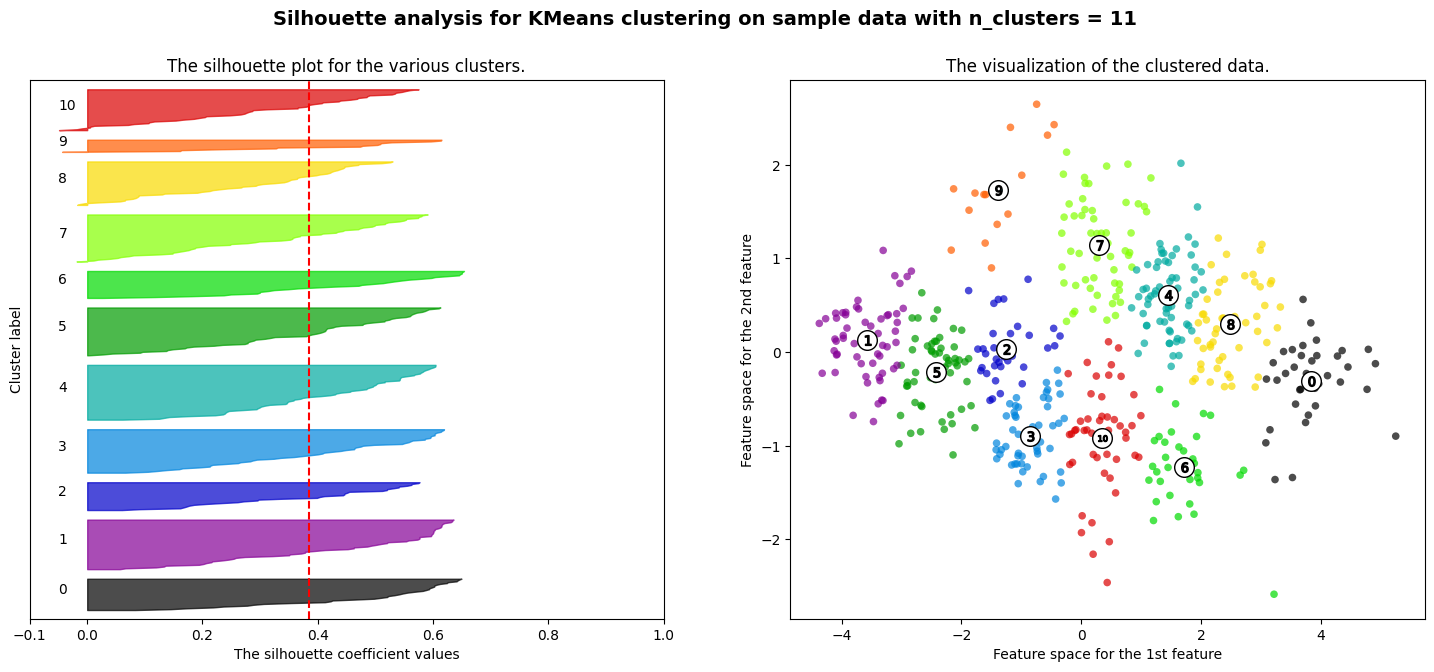

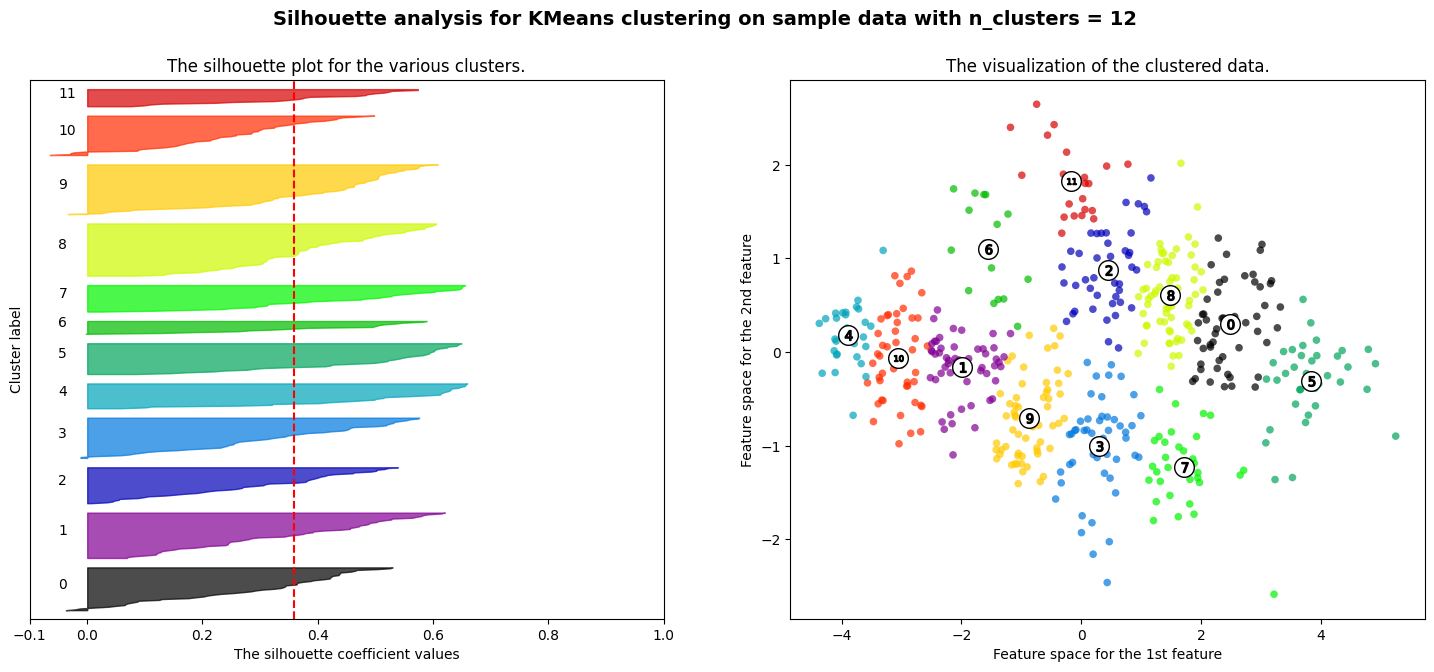

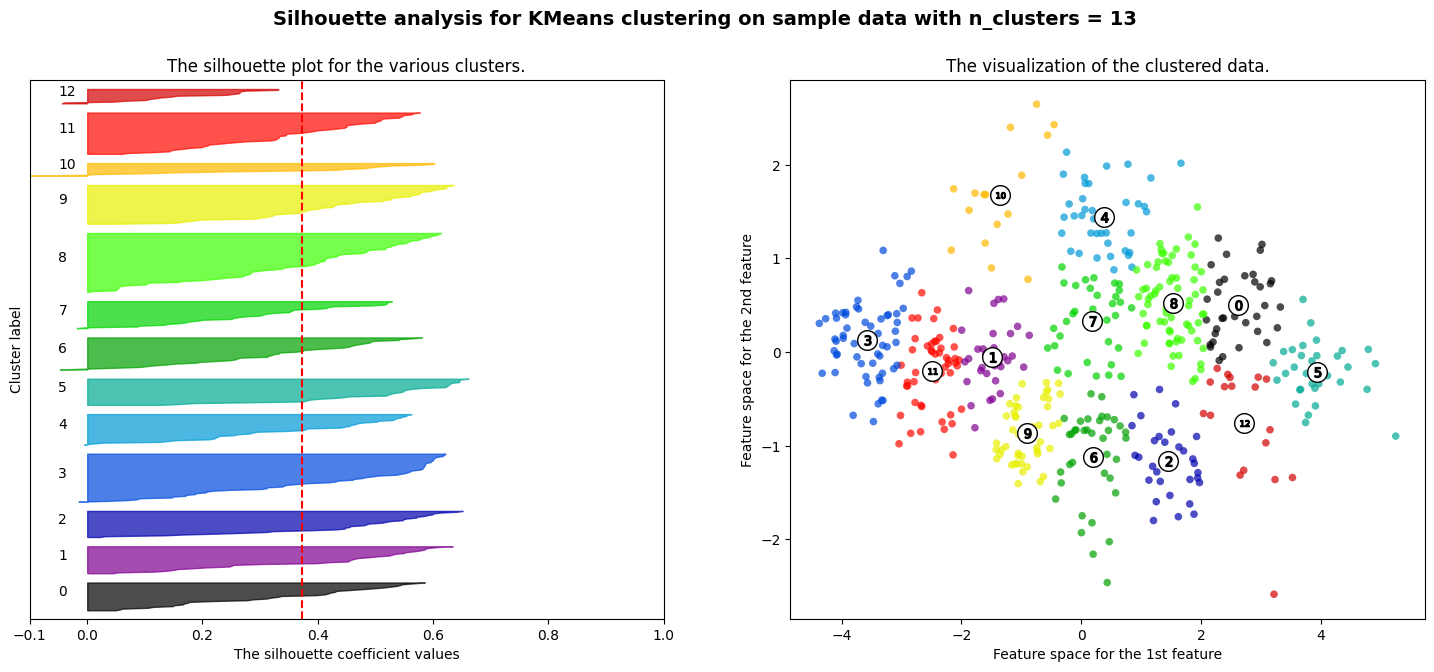

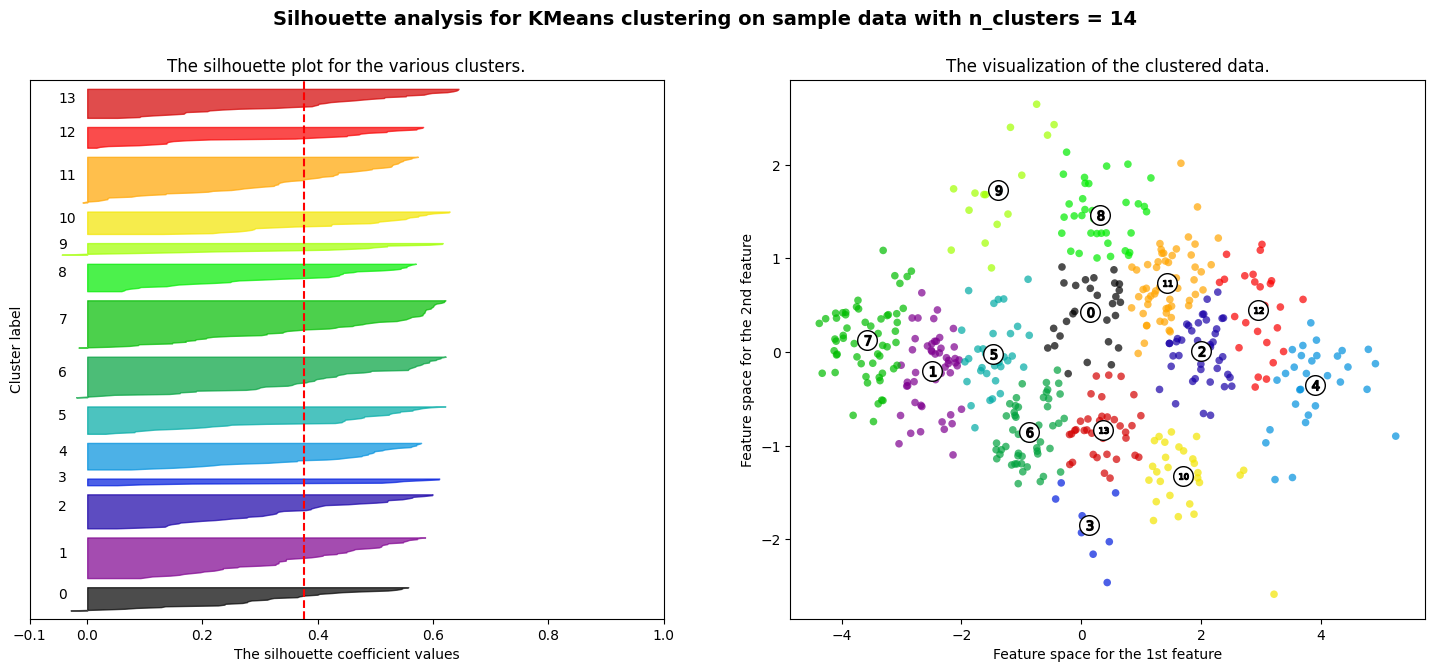

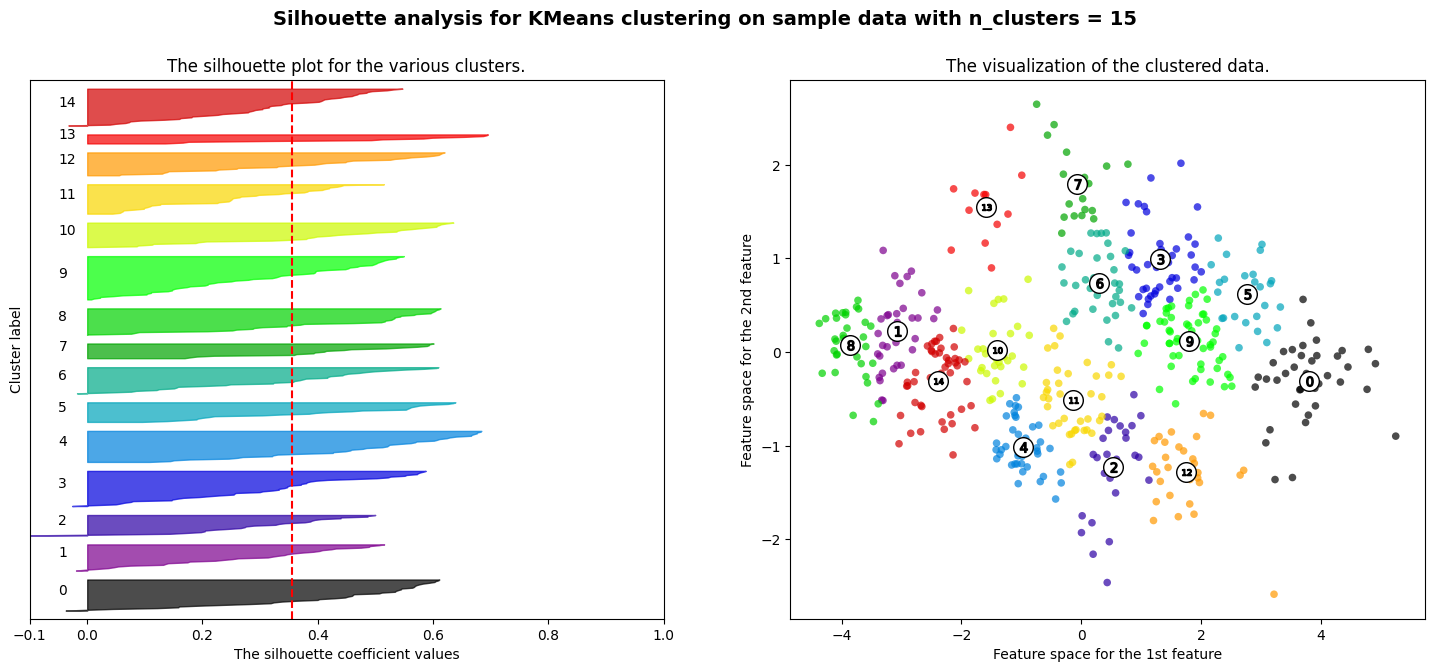

In [79]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm # colormaps
import numpy as np


range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
label_points = False
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(Xformed) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 42 for reproducibility.
    #clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    #cluster_labels = clusterer.fit_predict(Xformed)

    pipe1.named_steps.kmeans.set_params(n_clusters=n_clusters,random_state=42)
    clusterer = pipe1.named_steps.kmeans
    cluster_labels = pipe1.fit_predict(X)
    cluster_labels = KMeans(n_clusters=n_clusters, random_state=42).fit_predict(Xformed)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(Xformed, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(Xformed, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(Xformed[:, 0], Xformed[:, 1], marker='o', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    if label_points:
        for i,v in enumerate(Xformed):
            ax2.text(v[0],v[1],y.iloc[i][0],alpha=0.4)


    # Labeling the clusters
    centers = clusterer.cluster_centers_
    #print(centers)
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.savefig('silhouette%02d.pdf' % n_clusters)
plt.show()

Insert your code and answers here.

/Users/sarrahahmed/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sarrahahmed/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 2 The average silhouette_score is : 0.49769043741403296


/Users/sarrahahmed/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sarrahahmed/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 3 The average silhouette_score is : 0.41143535077744364


/Users/sarrahahmed/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sarrahahmed/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 4 The average silhouette_score is : 0.42902984948411965


/Users/sarrahahmed/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sarrahahmed/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 5 The average silhouette_score is : 0.4186423828899898


/Users/sarrahahmed/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sarrahahmed/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 6 The average silhouette_score is : 0.4369144366420892


/Users/sarrahahmed/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sarrahahmed/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 7 The average silhouette_score is : 0.4078641349972446


/Users/sarrahahmed/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sarrahahmed/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 8 The average silhouette_score is : 0.4014097207205349


/Users/sarrahahmed/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sarrahahmed/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 9 The average silhouette_score is : 0.3807985217753768


/Users/sarrahahmed/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sarrahahmed/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 10 The average silhouette_score is : 0.3880179559574267


/Users/sarrahahmed/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sarrahahmed/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 11 The average silhouette_score is : 0.3845433891182044


/Users/sarrahahmed/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sarrahahmed/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 12 The average silhouette_score is : 0.3595642392480805


/Users/sarrahahmed/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sarrahahmed/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 13 The average silhouette_score is : 0.37307957855606433


/Users/sarrahahmed/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sarrahahmed/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 14 The average silhouette_score is : 0.37562496644841237


/Users/sarrahahmed/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sarrahahmed/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 15 The average silhouette_score is : 0.35469096269187095


/Users/sarrahahmed/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sarrahahmed/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 2 The average silhouette_score is : 0.49769043741403296


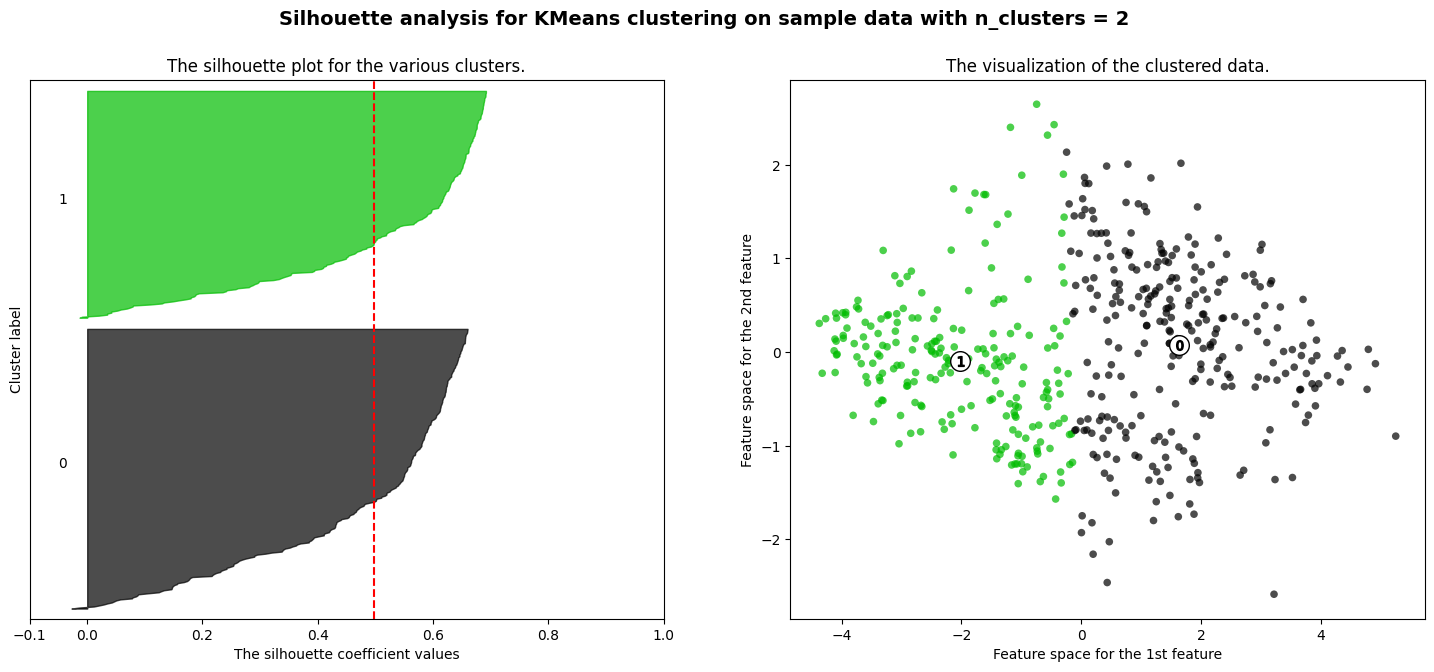

In [80]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
max_silhouette_avg = -1
optimal_n_clusters = None
label_points = False

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(Xformed) + (n_clusters + 1) * 10])

    pipe1.named_steps.kmeans.set_params(n_clusters=n_clusters, random_state=42)
    clusterer = pipe1.named_steps.kmeans
    cluster_labels = pipe1.fit_predict(X)
    cluster_labels = KMeans(n_clusters=n_clusters, random_state=42).fit_predict(Xformed)

    silhouette_avg = silhouette_score(Xformed, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    if silhouette_avg > max_silhouette_avg:
        max_silhouette_avg = silhouette_avg
        optimal_n_clusters = n_clusters

    sample_silhouette_values = silhouette_samples(Xformed, cluster_labels)

    y_lower = 10

    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])

    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(Xformed[:, 0], Xformed[:, 1], marker='o', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    if label_points:
        for i, v in enumerate(Xformed):
            ax2.text(v[0], v[1], y.iloc[i][0], alpha=0.4)

    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.savefig('silhouette%02d.pdf' % n_clusters)
    plt.close()

# Plot the silhouette plot for the optimal number of clusters with the highest silhouette score
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(Xformed) + (optimal_n_clusters + 1) * 10])

pipe1.named_steps.kmeans.set_params(n_clusters=optimal_n_clusters, random_state=42)
clusterer_optimal = pipe1.named_steps.kmeans
cluster_labels_optimal = pipe1.fit_predict(X)
cluster_labels_optimal = KMeans(n_clusters=optimal_n_clusters, random_state=42).fit_predict(Xformed)

silhouette_avg_optimal = silhouette_score(Xformed, cluster_labels_optimal)
print("For n_clusters =", optimal_n_clusters,
      "The average silhouette_score is :", silhouette_avg_optimal)

sample_silhouette_values_optimal = silhouette_samples(Xformed, cluster_labels_optimal)

y_lower = 10

for i in range(optimal_n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values_optimal[cluster_labels_optimal == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / optimal_n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

ax1.axvline(x=silhouette_avg_optimal, color="red", linestyle="--")

ax1.set_yticks([])

ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

colors_optimal = cm.nipy_spectral(cluster_labels_optimal.astype(float) / optimal_n_clusters)
ax2.scatter(Xformed[:, 0], Xformed[:, 1], marker='o', s=30, lw=0, alpha=0.7,
            c=colors_optimal, edgecolor='k')

if label_points:
    for i, v in enumerate(Xformed):
        ax2.text(v[0], v[1], y.iloc[i][0], alpha=0.4)

centers_optimal = clusterer_optimal.cluster_centers_
ax2.scatter(centers_optimal[:, 0], centers_optimal[:, 1], marker='o',
            c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers_optimal):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                s=50, edgecolor='k')

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % optimal_n_clusters),
             fontsize=14, fontweight='bold')
plt.show()


INTERPRETATION: 

Average silhouette method computes the average silhouette of observations for different values of k. The optimal number of clusters k is the one that maximize the average silhouette over a range of possible values for k (Kaufman and Rousseeuw 1990). 

After calculating the average silhouette score for values of n_clustering ranging from 2 to 15, we find the highest average occurs when n_clustering=2.

We will choose this as the optimal clustering due to the high silhouette score, but optimal clustering values should have averages that fall between most of the data points and split our silhouettes so most falls above the average line. 

In our plot we see most values in each cluster are below the average dotted red line. It is still optimal because it is curved and long unlike the dagger shapes that many clusters above 2 look like

Additionally the second plot shows relatively even clusters that do not overlap a lot. Even though many averages are similar, as n increases, the clusters begin to overlap so n=2 is once again the optimal number of clusters.


We have two clusters that are even in size, close to each other, and exhibit little overlap, which implies the presence of two distinct groups within the data and the data points within each cluster are relatively homogenous and may share common characteristics



## Task 6 (3 points):
Show the results of a t-SNE analysis of the admissions data.  As before, do not use the chance of admission column or the "admitted" variable you created in the previous step in your input data.  Color the points in your visualization based on the "admitted" variable you created earlier.

Insert your code and answers here.

In [100]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0, perplexity=30)
X = X_test.copy()
X_2d = tsne.fit_transform(X)

In [97]:
X_2d

array([[ 13.944539  , -17.632242  ],
       [ -0.7479846 ,  -1.833042  ],
       [  1.1864665 ,   0.51058626],
       [ -1.8827477 ,  -1.6204569 ],
       [  9.326176  , -12.183887  ],
       [  9.2182255 , -14.703669  ],
       [-15.559286  ,  11.024804  ],
       [-11.148532  ,   5.7619066 ],
       [  3.3780024 ,  -4.9213367 ],
       [  5.211646  ,  -7.4459987 ],
       [  6.126557  , -10.705325  ],
       [  1.985266  ,  -4.1697626 ],
       [  6.26913   ,  -1.3222895 ],
       [ 15.165312  , -19.169111  ],
       [  7.170416  , -11.199036  ],
       [-14.128693  ,  11.636963  ],
       [  7.9087234 , -15.646595  ],
       [-11.753324  ,  12.009749  ],
       [-12.996279  ,   9.043704  ],
       [-13.826978  ,   9.1515665 ],
       [ -5.5146785 ,   3.2399268 ],
       [-13.862004  ,  10.1768465 ],
       [ -2.4009075 ,   3.0600595 ],
       [  7.5819087 , -13.393882  ],
       [  9.809736  , -12.688021  ],
       [-10.87868   ,   8.220704  ],
       [ 13.772375  , -15.709664  ],
 

In [93]:
y_test

361    0.93
73     0.84
374    0.39
155    0.77
104    0.74
       ... 
347    0.42
86     0.72
75     0.72
438    0.67
15     0.54
Name: Chance of Admit , Length: 100, dtype: float64

In [104]:
admit.admitted

0      1
1      1
2      1
3      1
4      1
      ..
495    1
496    1
497    1
498    1
499    1
Name: admitted, Length: 500, dtype: int64

In [105]:
tsne_labelled = pd.concat([pd.DataFrame({'chance_of_admit':y_test.values}),pd.DataFrame(X_2d,columns=['d1','d2']),pd.DataFrame({'admitted':admit.admitted})],axis=1)
tsne_labelled

,chance_of_admit,d1,d2,admitted
0,0.93,-6.965258,5.315832,1
1,0.84,1.202285,4.242015,1
2,0.39,0.968733,3.124618,1
3,0.77,1.867694,4.116325,1
4,0.74,-4.522123,5.039320,1
...,...,...,...,...
495,NaN,NaN,NaN,1
496,NaN,NaN,NaN,1
497,NaN,NaN,NaN,1
498,NaN,NaN,NaN,1


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

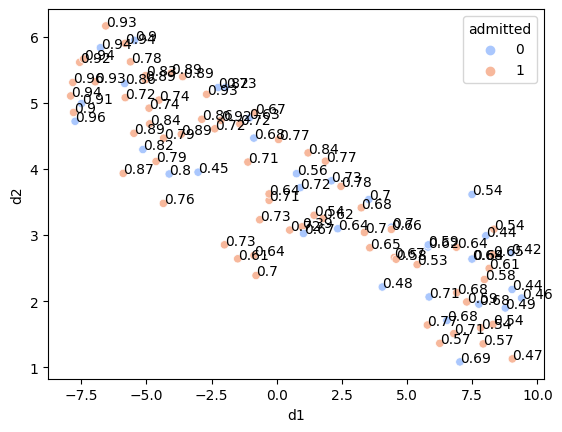

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

def labelled_scatterplot(data=None, x=None, y=None, labs=None, hue=None):
    # Use Seaborn's scatterplot with hue
    p1 = sns.scatterplot(data=data, x=x, y=y, hue=hue, palette='coolwarm')
    
    # Add labels to points
    for line in range(0, data.shape[0]):
        p1.text(data[x][line] + 0.01, data[y][line], 
                data[labs][line], horizontalalignment='left', 
                size='medium', color='black')

    # Show the legend
    plt.legend(title=hue)

# Example usage with 'admitted' as the hue
labelled_scatterplot(data=tsne_labelled, x='d1', y='d2', labs='chance_of_admit', hue='admitted')
plt.show()


Here we see a slightly negative linear relationship between the dimensions, but since t-SNE tests are not meant to capture non-linear relationships, the relationship we see between d1 and d2 is either indicative of a more complex non-linear relationship or suggests that, in the high-dimensional space, as values of one or more features increase, the corresponding values of other features tend to decrease. 

it seems as though most of the "admitted" points appear in the top left corner of our plot. This implies that d2 may be more influential in determining admission in the dataset